In [1]:
 #importing the necessary libraries/modules
#importing the iris dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from scipy.spatial import Voronoi, voronoi_plot_2d

from itertools import cycle, combinations

from sklearn import mixture

from sklearn.datasets import load_iris, make_blobs
from sklearn.cluster import KMeans 


iris = load_iris() 
iris_X = iris.data[:, :2]
iris_y = iris.target

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Text(0, 0.5, 'Sepal Width')

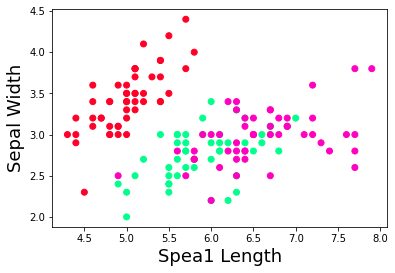

In [2]:
#plotting the iris data
plt.scatter(iris_X[:,0], iris_X[:,1], c=iris_y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [3]:
#making blobs of the iris dataset
blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

iris_blobs = make_blobs(2000, centers= blob_centers, cluster_std = blob_std, center_box = (-1,1), random_state=8)
synthetic_data = {"blobs" : iris_blobs}

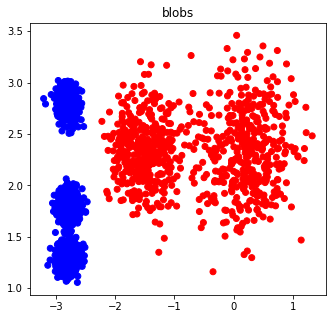

In [4]:
#plotting the two blobs

plt.figure(figsize = (18,5))
i = 0
for name, (X, y) in synthetic_data.items():
     plt.subplot(131 + i)
     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))
     plt.title(name)
     i += 1
 
plt.show()

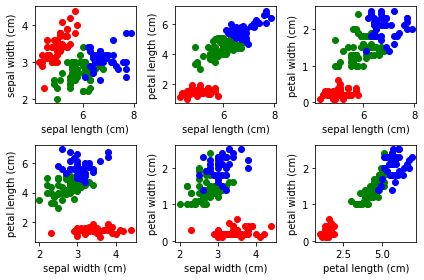

In [5]:
#implementing kmeans algorithm on iris dataset with k=3
km = KMeans(n_clusters=3,n_init=3,random_state=123 )
km.fit(iris.data)

predictions = km.predict(iris.data)

colors = cycle('rgb')
labels = ["Cluster 1","Cluster 2","Cluster 3"]
targets = range(len(labels))

feature_index=range(len(iris.feature_names))
feature_names=iris.feature_names
combs=combinations(feature_index,2)

f,axarr=plt.subplots(2,3)
axarr_flat=axarr.flat

for comb, axflat in zip(combs,axarr_flat):
        for target, color, label in zip(targets,colors,labels):
                feature_index_x=comb[0]
                feature_index_y=comb[1]

                axflat.scatter(iris.data[predictions==target,feature_index_x],

                iris.data[predictions==target,feature_index_y],c=color,label=label)
                axflat.set_xlabel(feature_names[feature_index_x])
                axflat.set_ylabel(feature_names[feature_index_y])

f.tight_layout()
plt.show()

In [6]:
#for k=3
#Value of the centroids, thier labels and the value of inertia 

centers_one = km.cluster_centers_
print(centers_one)

print()

print(km.labels_)

print()

print(km.inertia_)

[[5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]

78.8556658259773


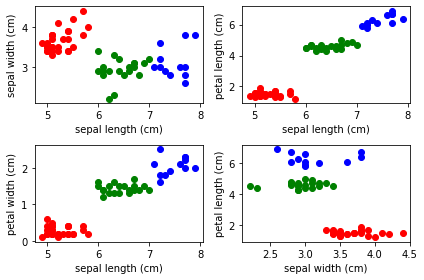

In [7]:
#implementing kmeans algorithm on iris dataset with k=8
km = KMeans(n_clusters=8,n_init=3,random_state=123 )
km.fit(iris.data)

predictions = km.predict(iris.data)

colors = cycle('rgb')
labels = ["Cluster 1","Cluster 2","Cluster 3"]
targets = range(len(labels))

feature_index=range(len(iris.feature_names))
feature_names=iris.feature_names
combs=combinations(feature_index,2)

f,axarr=plt.subplots(2,2)
axarr_flat=axarr.flat

for comb, axflat in zip(combs,axarr_flat):
        for target, color, label in zip(targets,colors,labels):
                feature_index_x=comb[0]
                feature_index_y=comb[1]

                axflat.scatter(iris.data[predictions==target,feature_index_x],

                iris.data[predictions==target,feature_index_y],c=color,label=label)
                axflat.set_xlabel(feature_names[feature_index_x])
                axflat.set_ylabel(feature_names[feature_index_y])

f.tight_layout()
plt.show()

In [8]:
#for k=8
#Value of the centroids, thier labels and the value of inertia


centers_two = km.cluster_centers_
print(centers_two)

print()

print(km.labels_)

print()

print(km.inertia_)

[[5.24285714 3.66785714 1.5        0.28214286]
 [6.43       2.94       4.59       1.435     ]
 [7.475      3.125      6.3        2.05      ]
 [6.56818182 3.08636364 5.53636364 2.16363636]
 [5.39230769 2.43846154 3.65384615 1.12307692]
 [4.70454545 3.12272727 1.41363636 0.2       ]
 [5.65333333 2.80666667 4.22666667 1.32      ]
 [6.02777778 2.73333333 5.02777778 1.79444444]]

[0 5 5 5 0 0 5 0 5 5 0 5 5 5 0 0 0 0 0 0 0 0 5 0 5 5 0 0 0 5 5 0 0 0 5 5 0
 0 5 0 0 5 5 0 0 5 0 5 0 5 1 1 1 4 1 6 1 4 1 4 4 6 4 1 4 1 6 6 1 4 7 6 7 1
 1 1 1 1 1 4 4 4 6 7 6 1 1 1 6 4 6 1 6 4 6 6 6 1 4 6 3 7 2 3 3 2 6 2 3 2 3
 7 3 7 7 3 3 2 2 7 3 7 2 7 3 2 7 7 3 2 2 2 3 7 7 2 3 3 7 3 3 3 7 3 3 3 7 3
 3 7]

30.32581102231103


In [9]:
#predicting instances with X_new

X_new = np.array([[0.2], [3.2], [-3.3], [-3, 2.5]])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


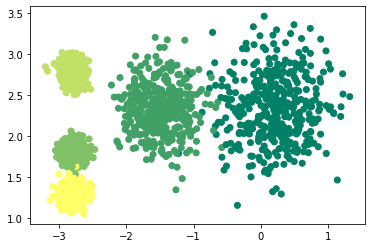

In [10]:
#plotting the voronoi plot

centers = km.cluster_centers_

vor = Voronoi(centers)
#voronoi_plot_2d(vor)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

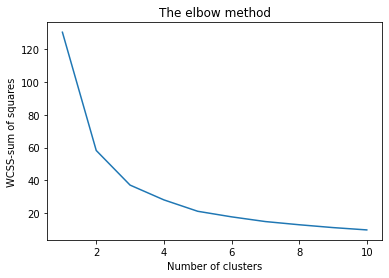

In [11]:
#The elbow method
#Finding the optimum number of clusters ie optimum value of k 

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_X)
    wcss.append(kmeans.inertia_)
    
#Plotting inertia as function of k, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS-sum of squares') #within cluster sum of squares
plt.show()

###In the above graph, the optimum clusters is where the elbow occurs which is k=3 in this case. 

###This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.



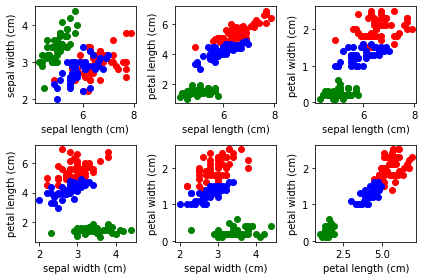

In [12]:
#Implementing Gaussian Mixture models


gmm = mixture.GaussianMixture(n_components=3,covariance_type='full')
gmm.fit(iris.data)

predictions = gmm.predict(iris.data)

colors = cycle('rgb')
labels = ["Cluster 1","Cluster 2","Cluster 3"]
targets = range(len(labels))

feature_index=range(len(iris.feature_names))
feature_names=iris.feature_names
combs=combinations(feature_index,2)

f,axarr=plt.subplots(2,3)
axarr_flat=axarr.flat

for comb, axflat in zip(combs,axarr_flat):
    for target, color, label in zip(targets,colors,labels):
      feature_index_x=comb[0]
      feature_index_y=comb[1]
      axflat.scatter(iris.data[predictions==target,feature_index_x],

    iris.data[predictions==target,feature_index_y],c=color,label=label)
      axflat.set_xlabel(feature_names[feature_index_x])
      axflat.set_ylabel(feature_names[feature_index_y])


plt.tight_layout()
plt.show()
